## Домашнее задание №2

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 14,
                     'xtick.labelsize': 14})

1. Сгенерировать датасет при помощи `sklearn.datasets.make_regression` и обучить линейную модель при помощи градиентного спуска и стохастического градиентного спуска. Построить графики среднеквадратичной ошибки от числа итераций для обоих методов на одном рисунке, сделать выводы о разнице скорости сходимости каждого из методов.

* Функции

In [2]:
# Расчет ошибки МНК
def calc_mse(y, y_pred):
    err = np.mean((y - y_pred)**2)
    return err

In [3]:
# Метод градиентного спуска
def eval_GD(X, y, iterations, alpha=1e-4):
    error=[]
    np.random.seed(42)
    w = np.random.randn(X.shape[1])
    n = X.shape[0]
    for i in range(1, iterations + 1):
        y_pred = np.dot(X, w)
        err = calc_mse(y, y_pred)
        w -= alpha * (1/n * 2 * np.dot((y_pred - y), X))
        error.append(err)
        if i % (iterations / 10) == 0:
            print(i, w, err)
    return w, error

In [4]:
# Метод стохастического градиентного спуска
# mini-batch GD & SGD
def eval_SGD(X, y, iterations, qty_in_batch=1, alpha=1e-4):
    error=[]
    np.random.seed(42)
    w = np.random.randn(X.shape[1]) # начальное приближение весов
    n = X.shape[0] # число наблюдений
    n_batch = n // qty_in_batch
    if n % qty_in_batch != 0:
        n_batch += 1
    for i in range(1, iterations + 1):
        for b in range(n_batch):
            start_ = qty_in_batch * b
            end_ = qty_in_batch * (b + 1)
            X_tmp = X[start_ : end_, :]
            y_tmp = y[start_ : end_]
            y_pred_tmp = np.dot(X_tmp, w)
            err = calc_mse(y_tmp, y_pred_tmp)
            w -= alpha * (1/n * 2 * np.dot((y_pred_tmp - y_tmp), X_tmp)) 
        error.append(err)           
        if i % (iterations / 10) == 0:
            print(i, w, err)
    return w, error

* Генерация датасета

In [5]:
from sklearn import datasets

X, y, coef = datasets.make_regression(n_samples=100, 
                                      n_features=2, 
                                      n_informative=2, 
                                      n_targets=1,
                                      noise=5, 
                                      coef=True, 
                                      random_state=42)

In [6]:
np.linalg.inv(X.T @ X) @ X.T @ y

array([86.85290273, 74.10093365])

In [7]:
w_gd, error_gd = eval_GD(X, y, iterations=2000, alpha=1e-3)
y_pred = np.dot(X, w_gd)
err_gd = calc_mse(y, y_pred)
print(f'MSE для метода градиентного спуска - {err_gd}\n')

200 [23.10899024 24.70682709] 5612.530257110318
400 [39.76433038 41.27899355] 2815.392053802098
600 [52.0435046  52.32250207] 1433.9012519426624
800 [61.10415082 59.67392808] 744.5492845136567
1000 [67.79518742 64.56171984] 396.9953819052217
1200 [72.73992955 67.80706573] 219.97271698276
1400 [76.39658108 69.95853941] 128.9160344244753
1600 [79.10233756 71.38232336] 81.63940331651794
1800 [81.105593   72.32264247] 56.87946576693996
2000 [82.58949571 72.94222593] 43.808816497014185
MSE для метода градиентного спуска - 43.76207218850394



In [8]:
w_sgd, error_sgd = eval_SGD(X, y, iterations=2000, alpha=1e-3)
y_pred_sgd = np.dot(X, w_sgd)
err_sgd = calc_mse(y, y_pred_sgd)
print(f'MSE для метода стохастического градиентного спуска - {err_sgd}\n')

200 [23.09499332 24.68670794] 2550.9489151764924
400 [39.74374261 41.25205544] 1104.1527423439388
600 [52.02076565 52.29546264] 458.13369724494237
800 [61.08180093 59.64981322] 176.8724782652302
1000 [67.77457042 64.54156602] 59.8371229981769
1200 [72.72165257 67.7909023 ] 15.282837471545294
1400 [76.38081238 69.94594019] 1.6217528844549083
1600 [79.08899689 71.3727043 ] 0.297931973980252
1800 [81.09447128 72.3154127 ] 3.2546606854516744
2000 [82.5803284  72.93685644] 7.161443154751108
MSE для метода стохастического градиентного спуска - 43.83383047295248



* Графики среднеквадратичной ошибки от числа итераций

Text(0, 0.5, 'MSE')

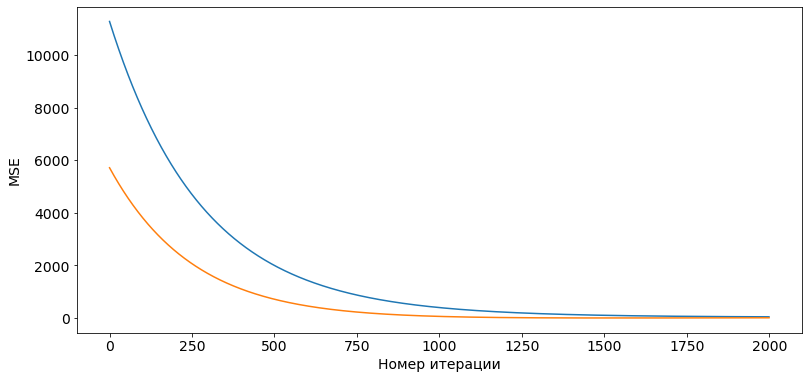

In [9]:
plt.figure(figsize=(13, 6))
plt.plot(error_gd, alpha=1)
plt.plot(error_sgd, alpha=1)
plt.xlabel('Номер итерации')
plt.ylabel('MSE')

Скорость схождения метода стохастического градиентного спуска выше, при этом обе сходимости значительно зависят от скорости обучения.

2. Модифицировать решение первого задания путем добавления L2 регуляризации и сравнить результаты.  

In [10]:
# Метод градиентного спуска
def eval_GD_Ridge(X, y, iterations, alpha=1e-4, lambda_=1e-8):
    error=[]
    np.random.seed(42)
    w = np.random.randn(X.shape[1])
    n = X.shape[0]
    for i in range(1, iterations + 1):
        y_pred = np.dot(X, w)
        err = calc_mse(y, y_pred)
        w -= alpha * (1/n * 2 * np.dot((y_pred - y), X) + 2 * lambda_ * w)
        error.append(err)
        if i % (iterations / 10) == 0:
            print(i, w, err)
    return w, error

In [11]:
# Метод стохастического градиентного спуска
# mini-batch GD & SGD
def eval_SGD_Ridge(X, y, iterations, qty_in_batch=1, alpha=1e-4, lambda_=1e-8):
    error=[]
    np.random.seed(42)
    w = np.random.randn(X.shape[1]) # начальное приближение весов
    n = X.shape[0] # число наблюдений
    n_batch = n // qty_in_batch
    if n % qty_in_batch != 0:
        n_batch += 1
    for i in range(1, iterations + 1):
        for b in range(n_batch):
            start_ = qty_in_batch * b
            end_ = qty_in_batch * (b + 1)
            X_tmp = X[start_ : end_, :]
            y_tmp = y[start_ : end_]
            y_pred_tmp = np.dot(X_tmp, w)
            err = calc_mse(y_tmp, y_pred_tmp)
            w -= alpha * (1/n * 2 * np.dot((y_pred_tmp - y_tmp), X_tmp) + 2 * lambda_ * w) 
        error.append(err)           
        if i % (iterations / 10) == 0:
            print(i, w, err)
    return w, error

In [12]:
lambda_Ridge=1e-3

* Сравнение результатов

In [13]:
w_gd, error_gd = eval_GD(X, y, iterations=2000, alpha=1e-3)
y_pred = np.dot(X, w_gd)
err_gd = calc_mse(y, y_pred)
print(f'Метод градиентного спуска без регуляризации: {w_gd} MSE: {err_gd}\n')

200 [23.10899024 24.70682709] 5612.530257110318
400 [39.76433038 41.27899355] 2815.392053802098
600 [52.0435046  52.32250207] 1433.9012519426624
800 [61.10415082 59.67392808] 744.5492845136567
1000 [67.79518742 64.56171984] 396.9953819052217
1200 [72.73992955 67.80706573] 219.97271698276
1400 [76.39658108 69.95853941] 128.9160344244753
1600 [79.10233756 71.38232336] 81.63940331651794
1800 [81.105593   72.32264247] 56.87946576693996
2000 [82.58949571 72.94222593] 43.808816497014185
Метод градиентного спуска без регуляризации: [82.58949571 72.94222593] MSE: 43.76207218850394



In [14]:
w_gd_Ridge, error_gd_Ridge = eval_GD_Ridge(X, y, iterations=2000, alpha=1e-3, lambda_=lambda_Ridge)
y_pred_Ridge = np.dot(X, w_gd_Ridge)
err_gd_Ridge = calc_mse(y, y_pred_Ridge)
print(f'Метод градиентного спуска c Ridge регуляризацией: {w_gd_Ridge} MSE: {err_gd_Ridge} lambda: {lambda_Ridge}\n')

200 [23.10454258 24.70225471] 5613.4138854808325
400 [39.74993498 41.26473343] 2817.369815228588
600 [52.01685859 52.29736463] 1436.423516797149
800 [61.06483889 59.6386078 ] 747.1260489569207
1000 [67.74384524 64.51767399] 399.34097348780654
1200 [72.67771955 67.7559287 ] 221.9670693720527
1400 [76.32487267 69.90184146] 130.53989151635827
1600 [79.02251966 71.32137656] 82.924310470708
1800 [81.01897103 72.2585141 ] 57.87678873583528
2000 [82.49724127 72.8757539 ] 44.57298555685962
Метод градиентного спуска c Ridge регуляризацией: [82.49724127 72.8757539 ] MSE: 44.5252059473217 lambda: 0.001



In [15]:
w_sgd, error_sgd = eval_SGD(X, y, iterations=2000, alpha=1e-3)
y_pred_sgd = np.dot(X, w_sgd)
err_sgd = calc_mse(y, y_pred_sgd)
print(f'MSE для метода стохастического градиентного спуска без регуляризации: {w_sgd} MSE: {err_sgd}\n')

200 [23.09499332 24.68670794] 2550.9489151764924
400 [39.74374261 41.25205544] 1104.1527423439388
600 [52.02076565 52.29546264] 458.13369724494237
800 [61.08180093 59.64981322] 176.8724782652302
1000 [67.77457042 64.54156602] 59.8371229981769
1200 [72.72165257 67.7909023 ] 15.282837471545294
1400 [76.38081238 69.94594019] 1.6217528844549083
1600 [79.08899689 71.3727043 ] 0.297931973980252
1800 [81.09447128 72.3154127 ] 3.2546606854516744
2000 [82.5803284  72.93685644] 7.161443154751108
MSE для метода стохастического градиентного спуска без регуляризации: [82.5803284  72.93685644] MSE: 43.83383047295248



In [16]:
w_sgd_Ridge, error_sgd_Ridge = eval_SGD_Ridge(X, y, iterations=2000, alpha=1e-3, lambda_=lambda_Ridge)
y_pred_sgd_Ridge = np.dot(X, w_sgd_Ridge)
err_sgd_Ridge = calc_mse(y, y_pred_sgd_Ridge)
print(f'MSE для метода стохастического градиентного спуска c Ridge регуляризацией: {w_sgd_Ridge} MSE: {err_sgd_Ridge} lambda: {lambda_Ridge}\n')

200 [22.65435314 24.23398633] 2598.485194771946
400 [38.33818317 39.85971648] 1202.8809749031782
600 [49.45003441 49.86838708] 574.5427361804232
800 [57.32945733 56.27239571] 286.11669628414336
1000 [62.92118589 60.36507004] 150.3559439833569
1200 [66.8923087  62.97707153] 84.41520167196907
1400 [69.71439238 64.64152197] 51.165787647467745
1600 [71.72113366 65.70030421] 33.68302362864588
1800 [73.1488935  66.37246304] 24.079968181540774
2000 [74.16523643 66.79819694] 18.5773635328158
MSE для метода стохастического градиентного спуска c Ridge регуляризацией: [74.16523643 66.79819694] MSE: 204.855472195527 lambda: 0.001



Абсолютно странно и непонятно. но в обоих случаях использование регуляризации ведет к увеличению ошибки. Ну или у меня где-то ошибка в коде.